In [100]:
# 캐글과 연동
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ekgus9","key":"e87e42ec6bf155bd3ad4d10dc4e5039c"}'}

In [101]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [102]:
!kaggle competitions download -c sf-crime
#!unzip train.zip

  0% 0.00/2.35M [00:00<?, ?B/s]
100% 2.35M/2.35M [00:00<00:00, 79.2MB/s]
 41% 9.00M/22.1M [00:00<00:00, 92.7MB/s]
100% 22.1M/22.1M [00:00<00:00, 136MB/s] 
 48% 9.00M/18.7M [00:00<00:00, 32.8MB/s]
100% 18.7M/18.7M [00:00<00:00, 53.8MB/s]


In [5]:
# 파일 업로드
myfile = files.upload()

Saving sampleSubmission.csv to sampleSubmission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [14]:
import io
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [15]:
train=pd.read_csv(io.BytesIO(myfile['train.csv']))
test=pd.read_csv(io.BytesIO(myfile['test.csv']))
submission=pd.read_csv(io.BytesIO(myfile['sampleSubmission.csv']))

In [16]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [18]:
# 유형별 범죄 발생 가능성
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [19]:
# null값 확인
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [20]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [24]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [30]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [31]:
# datetime64로 변환하면 나누기 쉬움
train['Dates'] = train['Dates'].astype('datetime64')

In [32]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

In [34]:
pd.value_counts(train['year']).sort_index()

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

In [35]:
pd.value_counts(train['month']).sort_index()

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: month, dtype: int64

In [37]:
train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [38]:
y_train = train['Category']

In [39]:
# test 데이터에 없는 train 데이터 drop
train = train.drop(['Dates','Category','Descript','Resolution'], axis=1)

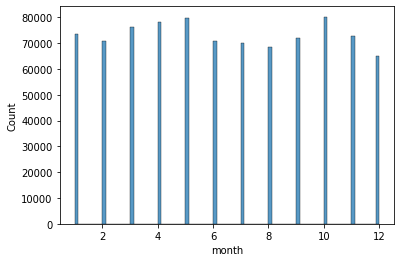

In [45]:
sns.histplot(data=train,x='month')

In [48]:
test = test.drop(['Id'],axis=1)
test['Dates'] = test['Dates'].astype('datetime64')
test['year'] = test['Dates'].dt.year
test['month'] = test['Dates'].dt.month
test['day'] = test['Dates'].dt.day
test['hour'] = test['Dates'].dt.hour
test['minute'] = test['Dates'].dt.minute

In [51]:
test = test.drop(['Dates','day','minute'],axis=1)
test.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,hour
0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,23
1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,23
2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,23
3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,23
4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,23


In [52]:
train = train.drop(['day','minute'],axis=1)
train.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,hour
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23
3,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23
4,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23


In [53]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['DayOfWeek'] = lb.fit_transform(train['DayOfWeek'])

In [83]:
test.dtypes

DayOfWeek       int64
PdDistrict      int64
X             float64
Y             float64
year            int64
month           int64
hour            int64
block           int64
ST              int64
dtype: object

In [55]:
train['PdDistrict'] = lb.fit_transform(train['PdDistrict'])

In [57]:
test['DayOfWeek'] = lb.fit_transform(test['DayOfWeek'])
test['PdDistrict'] = lb.fit_transform(test['PdDistrict'])

In [67]:
# Address 데이터 나눔
train['block'] = train['Address'].str.contains('block', case=False)
test['block'] = test['Address'].str.contains('block', case=False)
train['ST'] = train['Address'].str.contains('ST', case=False)
test['ST'] = test['Address'].str.contains('ST', case=False)

In [68]:
train = train.drop(['Address'],axis=1)
test = test.drop(['Address'],axis=1)

In [71]:
train['block'] = lb.fit_transform(train['block'])
test['block'] = lb.fit_transform(test['block'])
train['ST'] = lb.fit_transform(train['ST'])
test['ST'] = lb.fit_transform(test['ST'])

In [78]:
# 열 동일 확인
print(train.shape,test.shape)

(878049, 9) (884262, 9)


In [85]:
y_train = lb.fit_transform(y_train)

In [86]:
# Xgboost
import xgboost as xgb
x_train = xgb.DMatrix(train,label=y_train)
x_test = xgb.DMatrix(test)
params = {'max_depth':4,'eta':0.3,'silent':1,'objective':'multi:softprob','num_class':39}
xg = xgb.cv(params,x_train, nfold=3, early_stopping_rounds=10,metrics='mlogloss',verbose_eval=True)


[0]	train-mlogloss:3.13814+0.0017213	test-mlogloss:3.13899+0.00130763
[1]	train-mlogloss:2.95894+0.00190675	test-mlogloss:2.96041+0.00129772
[2]	train-mlogloss:2.84124+0.00183219	test-mlogloss:2.84335+0.00130917
[3]	train-mlogloss:2.7578+0.00113813	test-mlogloss:2.76045+0.000489928
[4]	train-mlogloss:2.69486+0.00116536	test-mlogloss:2.69787+0.000765751
[5]	train-mlogloss:2.64547+0.00127733	test-mlogloss:2.6489+0.00130682
[6]	train-mlogloss:2.60702+0.00105369	test-mlogloss:2.61084+0.00137542
[7]	train-mlogloss:2.57611+0.00161284	test-mlogloss:2.58034+0.00153973
[8]	train-mlogloss:2.54988+0.00170958	test-mlogloss:2.55452+0.00143254
[9]	train-mlogloss:2.52919+0.00165999	test-mlogloss:2.53422+0.00124928


In [87]:
x_train = xgb.train(params, x_train, 10)
pred_xgb = x_train.predict(x_test)

In [96]:
submission = pd.DataFrame(pred_xgb,columns=lb.inverse_transform(np.linspace(0, 38, 39, dtype='int16')),index=test.index)
submission.to_csv('sampleSubmission.csv', index_label='Id')

In [92]:
submission

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.006503,0.126181,0.005205,0.005545,0.045144,0.006611,0.007534,0.026074,0.007332,0.005807,0.005291,0.007351,0.007327,0.011017,0.005187,0.008737,0.102325,0.006245,0.005299,0.075354,0.073073,0.079297,0.005109,0.008093,0.005106,0.028065,0.007203,0.019608,0.009478,0.005264,0.009677,0.005729,0.035203,0.005095,0.010905,0.069608,0.096676,0.032595,0.018144
1,0.004762,0.051014,0.004116,0.004429,0.005629,0.005250,0.007359,0.054510,0.007009,0.004124,0.004138,0.004142,0.004707,0.007936,0.005546,0.005621,0.088454,0.005459,0.004453,0.006890,0.044986,0.359821,0.004081,0.006329,0.004078,0.054893,0.004377,0.011322,0.005874,0.004204,0.007729,0.004107,0.028310,0.004070,0.004977,0.039240,0.058501,0.050974,0.016580
2,0.005219,0.070352,0.004176,0.004282,0.092386,0.005151,0.006046,0.012846,0.008529,0.005095,0.004512,0.004343,0.007933,0.017470,0.004206,0.005961,0.329417,0.004455,0.004426,0.019395,0.079405,0.058015,0.004100,0.005956,0.004089,0.022521,0.004538,0.012633,0.007788,0.004154,0.009389,0.004452,0.028556,0.004089,0.010010,0.050856,0.047477,0.018574,0.007196
3,0.006721,0.103781,0.005096,0.005429,0.039886,0.006117,0.007575,0.023999,0.006914,0.005547,0.005180,0.005917,0.007174,0.013441,0.005078,0.008555,0.126488,0.006114,0.005188,0.053750,0.076909,0.084637,0.005002,0.006734,0.004999,0.031308,0.007099,0.021301,0.008636,0.005153,0.009474,0.005432,0.034014,0.004989,0.008757,0.070251,0.125247,0.026790,0.015318
4,0.006721,0.103781,0.005096,0.005429,0.039886,0.006117,0.007575,0.023999,0.006914,0.005547,0.005180,0.005917,0.007174,0.013441,0.005078,0.008555,0.126488,0.006114,0.005188,0.053750,0.076909,0.084637,0.005002,0.006734,0.004999,0.031308,0.007099,0.021301,0.008636,0.005153,0.009474,0.005432,0.034014,0.004989,0.008757,0.070251,0.125247,0.026790,0.015318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0.006046,0.103223,0.007280,0.005155,0.034306,0.008975,0.006614,0.036588,0.010386,0.010404,0.004919,0.005085,0.046379,0.043090,0.004823,0.006882,0.080066,0.009454,0.005268,0.026112,0.062744,0.117258,0.004750,0.010679,0.004735,0.021301,0.006567,0.015338,0.016455,0.005241,0.007610,0.005158,0.039372,0.004737,0.012044,0.055399,0.088056,0.046119,0.015383
884258,0.005635,0.076435,0.008345,0.004547,0.087259,0.012728,0.005913,0.017968,0.009377,0.012942,0.004967,0.004739,0.046460,0.047001,0.004542,0.006228,0.154995,0.005045,0.004910,0.016996,0.069159,0.086533,0.004427,0.010803,0.004413,0.018750,0.004900,0.012053,0.012218,0.004486,0.007802,0.004808,0.037910,0.004416,0.011481,0.060655,0.068090,0.031319,0.008743
884259,0.006857,0.099084,0.007126,0.005046,0.034905,0.007234,0.006474,0.023616,0.008132,0.010183,0.004815,0.005500,0.048792,0.057782,0.004721,0.007352,0.084063,0.005181,0.005156,0.033522,0.062784,0.100438,0.004649,0.005477,0.004635,0.018292,0.010688,0.018297,0.017395,0.006343,0.007746,0.005049,0.040632,0.004637,0.009604,0.064927,0.103567,0.034724,0.014573
884260,0.012761,0.099143,0.006992,0.004952,0.051100,0.008922,0.006143,0.033452,0.005808,0.010751,0.004725,0.006565,0.053040,0.049460,0.004699,0.006610,0.078750,0.005663,0.005850,0.030906,0.047768,0.094349,0.004562,0.006560,0.004548,0.018714,0.007289,0.014943,0.015086,0.005034,0.007309,0.005273,0.042031,0.004550,0.012191,0.065168,0.100562,0.043034,0.014736


In [103]:
!kaggle competitions submit -c sf-crime -f sampleSubmission.csv -m "Message"

100% 403M/403M [00:04<00:00, 102MB/s]
Successfully submitted to San Francisco Crime Classification